地学数据三维可视化课件第三节：PyVista

# <center>地学数据三维可视化-PyVista</center>
<br/>

<center><img src="./fig/demo.gif" style="float: center; height:300px" /><center>
<br/>

<div style="clear: both"></div>
<center>汪宇锋</center>
<div style="clear: both"></div>
<center>地球物理与空间信息学院</center>
<div style="clear: both"></div>
<center>2021年11月</center>

## 3D Geoscience

- Building three-dimensional (3D) subsurface models from field data and imaging techniques is a ubiquitous task in geological, hydrological, and resource estimation studies.

- Geoscientists need an underlying framework that can handle a variety of 3D data structures and visualize complex geospatial data types in addition to the limited data types that current free software handle.

- Such a framework would need to act as a glue across existing geo-software, streamlining data management, visualization, and development of reproducible research workflows.

## 3D Geoscience

- Available free and open-source software to integrate subsurface information as well as to visualize those data in a 3D rendering space is limited.

- The limitations have arisen from disconnects between commercial software used across industry and a lack of open-source tooling within the research community.

- Lack of software availability often leaves researchers without a toolset for integration across their different data types, such as pairing well locations, resource models, and geophysical images.



## 3D Geoscience
<br/>

<center><img src="./fig/integrated-scene.png" width="650" /></center>

<font size=4> An example of a typical subsurface study where data and models are co-located, including contextual information (DEM and satellite imagery), borehole measurements, a 3D structural geology model, and a 3D physical property model.
    </font>


## [PyVista](https://www.pyvista.org/)
<br/>

<table>
  <tr>
    <td><img src="./fig/bane.jpg" width="1000" /></td>
    <td>“PyVista is a common underlying framework that levels the playing field for all these libraries. It’s now easy for a researcher to do geophysical inversions in SimPEG, and then do geological modelling in GemPy, for example. Then they can integrate their results with a 3D visualization tool, PyVista – it’s been a powerful way for people to communicate their findings, and work across sub-disciplines in geoscience. ” <br/>
        -- Bane Sullivan </td>
  </tr>
 </table>


## [PyVista](https://www.pyvista.org/)
<br/>

<table>
  <tr>
    <td><img src="./fig/salt-dome.gif" width="1000" /></td>
    <td>“Our goal is to make 3D visualization and analysis approachable to domain-scientists so they can focus on the research questions at hand. ” </td>
  </tr>
 </table>


## [PyVista](https://www.pyvista.org/)
<br/>

<center><img src="./fig/pyvista-banner.png" width="950" /></center>

<font size=4> Credit by Sullivan and Kaszynski, (2019). PyVista: 3D plotting and mesh analysis through a streamlined interface for the Visualization Toolkit (VTK). Journal of Open Source Software, 4(37), 1450, https://doi.org/10.21105/joss.01450
    </font>


## [PyVista](https://www.pyvista.org/)

<center><img src="./fig/omfvista-demo.gif" width="700" /></center>


## [PyVista](https://www.pyvista.org/)
<br/>

<center><img src="./fig/pyvistaflow.jpg" width="750" /></center>

<font size=4> A typical geoscientific computing workflow (left to right) where PyVista can manage and visualize the data for exploration and insight at each stage of the workflow.
    </font>

## [PyVista on Transform-2021](https://github.com/banesullivan/transform-2021) 
<br/>

This workshop assumes you have anaconda on your machine. There is a provided
`environment.yml` file to create a conda virtual environment for installing PyVista and many other packages for the tutorials in this workshop.

1. Download entire repository
2. Run `conda env create --file=environment.yml`
3. Activate the environment: `conda activate t21-pyvista`



In [50]:
from IPython.display import HTML
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/FmNmRBsEBHE" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

## PyVista实例-Surface Draped

- Drape a surface (2D array) from a line in 3D space. This is a common task to create a 2.5D image/sectional mesh of data like GPR or airborne EM profiles (geophysics applications). This example provides a look into how to create a 2.5D sectional mesh from typical data in those use cases.

- Attached below are some example data for this: 
  * XYZ coordinates of a GPR path and 
  * a 2D array of data values produced from the GPR.

In [1]:
%matplotlib inline
from pyvista import set_plot_theme
set_plot_theme('document')

In [2]:
# sphinx_gallery_thumbnail_number = 3
import pyvista as pv
from pyvista import examples
import numpy as np
import matplotlib.pyplot as plt

# Extract the data archive and load these files
# 2D array of XYZ coordinates
# path = examples.download_gpr_path().points
path = pv.PolyData(np.loadtxt('./vtk-data/Data/gpr-example/path.txt',skiprows=1)).points
# 2D array of the data values from the imaging equipment
# data = examples.download_gpr_data_array()
data = np.load('./vtk-data/Data/gpr-example/data.npy')

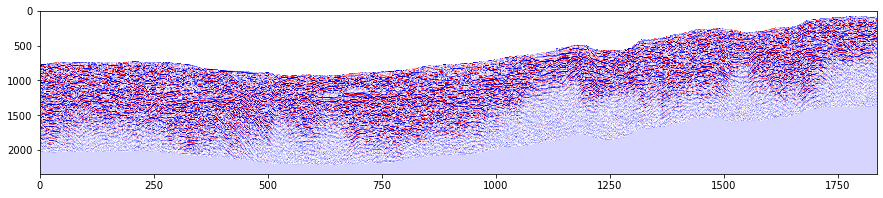

In [3]:
plt.figure(figsize=(15, 3))
plt.pcolormesh(data, cmap="seismic", clim=[-1, 1])
plt.gca().invert_yaxis()

View the the path of the GPR profile from a top-down perspective. Since we have the full coordinates (XY and Z), we can create a structured mesh "draping" down from those coordinates to hold the GPR image data.

Text(0, 0.5, 'Easting')

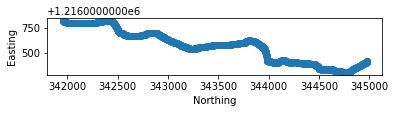

In [5]:
plt.scatter(path[:, 1], path[:, 0])
plt.axis("image")
plt.xlabel("Northing")
plt.ylabel("Easting")

In [6]:
assert len(path) in data.shape, "Make sure coordinates are present for every trace."
# If not, you'll need to interpolate the path!

# Grab the number of samples (in Z dir) and number of traces/soundings
nsamples, ntraces = data.shape  # Might be opposite for your data, pay attention here

# Define the Z spacing of your 2D section
z_spacing = 0.12

# Create structured points draping down from the path
points = np.repeat(path, nsamples, axis=0)
# repeat the Z locations across
tp = np.arange(0, z_spacing * nsamples, z_spacing)
tp = path[:, 2][:, None] - tp
points[:, -1] = tp.ravel()

Make a StructuredGrid from the structured points

In [7]:
grid = pv.StructuredGrid()
grid.points = points
grid.dimensions = nsamples, ntraces, 1

# Add the data array - note the ordering!
grid["values"] = data.ravel(order="F")

And now we can plot it! or process or do anything, because it is a PyVista mesh and the possibilities are endless with PyVista.

In [8]:
cpos = [
    (1217002.366883762, 345363.80666238244, 3816.828857791056),
    (1216322.4753436751, 344033.0310674846, 3331.052985309526),
    (-0.17716571330686096, -0.25634368781817973, 0.9502106207279767),
]

p = pv.Plotter()
p.add_mesh(grid, cmap="seismic", clim=[-1, 1])
p.add_mesh(pv.PolyData(path), color="orange")
p.show(cpos=cpos)

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

## PyVista实例-Terrain Following Mesh

- Use a topographic surface to create a 3D terrain-following mesh. Terrain following meshes are common in the environmental sciences, for instance in hydrological modelling (see [`ParFlow`](https://parflow.org)).

- In this example, we demonstrate a simple way to make a 3D grid/mesh that follows a given topographic surface. 

In [9]:
# sphinx_gallery_thumbnail_number = 3
import pyvista as pv
import numpy as np
from pyvista import examples

Download a gridded topography surface (DEM)

In [10]:
# dem = examples.download_crater_topo()
dem = pv.read('./vtk-data/Data/Ruapehu_mag_dem_15m_NZTM.vtk')
dem

UniformGrid (0x177beb7c0)
  N Cells:	1677401
  N Points:	1680000
  X Bounds:	1.810e+06, 1.831e+06
  Y Bounds:	5.640e+06, 5.658e+06
  Z Bounds:	0.000e+00, 0.000e+00
  Dimensions:	1400, 1200, 1
  Spacing:	1.500e+01, 1.500e+01, 0.000e+00
  N Arrays:	1

Now let's subsample and extract an area of interest to make this example simple (also the DEM we just load is pretty big). Since the DEM we loaded is a :class:`pyvista.UniformGrid` mesh, we can use the filter function: 

```python
pyvista.UniformGridFilters.extract_subset
```

In [11]:
subset = dem.extract_subset((500, 900, 400, 800, 0, 0), (5, 5, 1))
subset.plot(cpos="xy")

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

Now that we have a region of interest for our terrain following mesh, lets make a 3D surface of that DEM.

In [12]:
terrain = subset.warp_by_scalar()
terrain

StructuredGrid (0x178294d00)
  N Cells:	6400
  N Points:	6561
  X Bounds:	1.818e+06, 1.824e+06
  Y Bounds:	5.646e+06, 5.652e+06
  Z Bounds:	1.441e+03, 2.769e+03
  Dimensions:	81, 81, 1
  N Arrays:	1

In [13]:
terrain.plot()

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

And now we have a 3D structured surface of the terrain! We can now extend that structured surface into a 3D mesh to form a terrain following grid. To do this, we first our cell spacings in the z-direction (these start from the terrain surface). Then we repeat the XYZ structured coordinates of the terrain mesh and decrease each Z level by our Z cell spacing. Once we have those structured coordinates, we can create a class: `pyvista.StructuredGrid`.

In [14]:
z_cells = np.array([25] * 5 + [35] * 3 + [50] * 2 + [75, 100])

xx = np.repeat(terrain.x, len(z_cells), axis=-1)
yy = np.repeat(terrain.y, len(z_cells), axis=-1)
zz = np.repeat(terrain.z, len(z_cells), axis=-1) - np.cumsum(z_cells).reshape(
    (1, 1, -1)
)

mesh = pv.StructuredGrid(xx, yy, zz)
mesh["Elevation"] = zz.ravel(order="F")
mesh

StructuredGrid (0x178294750)
  N Cells:	70400
  N Points:	78732
  X Bounds:	1.818e+06, 1.824e+06
  Y Bounds:	5.646e+06, 5.652e+06
  Z Bounds:	9.364e+02, 2.744e+03
  Dimensions:	81, 81, 12
  N Arrays:	1

In [15]:
cpos = [
    (1826736.796308761, 5655837.275274233, 4676.8405505181745),
    (1821066.1790519988, 5649248.765538796, 943.0995128226014),
    (-0.2797856225380979, -0.27966946337594883, 0.9184252809434081),
]

mesh.plot(show_edges=True, lighting=False, cpos=cpos)

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

## PVGeo
<br/>

<center class="half">
    <img src="./fig/expansion-diagram.png" style="float: center; width:700px"/> 
</center>  

## PVGeo
<br/>

<center class="half">
    <img src="./fig/pvgeo-integrated-scene.png" style="float: center; width:800px"/> 
</center>  

## PVGeo实例-FORGE

In [16]:
import pyvista as pv
import PVGeo
import pandas as pd
import numpy as np
import imageio
import matplotlib.pyplot as plt
import shapefile
from sklearn.neighbors import KDTree as Tree
import os

In [17]:
assert os.path.isdir("./forge-demo/data")

In [18]:
!ls ./forge-demo/data

Negro_Mag_Fault_vertices.csv
Opal_Mound_Fault_vertices.csv
Roosevelt Hot Springs FORGE Site Outline
geology-aerial-compressed.png
land_surface_vertices.csv
model
temperature_model.sgems
top_granitoid_vertices.csv
well_based_temperature.csv


### Surfaces

Remember the surface data types from the presentation? Let's make some from raw data files we were given!

In [19]:
topo_df = pd.read_csv("./forge-demo/data/land_surface_vertices.csv")
topo_df.head()

,x,y,z
0,329924.988160,4.270951e+06,1493.691650
1,329924.988160,4.270926e+06,1493.996460
2,329949.993331,4.270926e+06,1493.786011
3,329949.993331,4.270951e+06,1493.691650
4,329974.998501,4.270926e+06,1493.790039


Looks like we have some simple `X, Y, Z` vertices, let's make a point cloud, then triangulate them into a surface mesh

In [20]:
topo = pv.PolyData(topo_df.values).delaunay_2d()
topo

PolyData,Information
N Cells,824279
N Points,413250
X Bounds,"3.299e+05, 3.442e+05"
Y Bounds,"4.253e+06, 4.271e+06"
Z Bounds,"1.494e+03, 2.723e+03"
N Arrays,0


In [21]:
topo.plot(notebook=True, show_grid=True)

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

Now let's do the same thing for all the other surfaces given by defining a simple function.

In [22]:
read_surf = lambda f: pv.PolyData(pd.read_csv(f).values).delaunay_2d()

granite_raw = read_surf("./forge-demo/data/top_granitoid_vertices.csv")
negro = read_surf("./forge-demo/data/Negro_Mag_Fault_vertices.csv")
opal = read_surf("./forge-demo/data/Opal_Mound_Fault_vertices.csv")
p = pv.Plotter()
p.add_mesh(granite_raw, color="gray")
p.add_mesh(negro, color="orange")
p.add_mesh(opal, color="blue")
p.add_mesh(topo, color="tan", opacity=0.5)

(vtkmodules.vtkRenderingOpenGL2.vtkOpenGLActor)0x104e8c8a0

In [23]:
p.show_grid()
p.show()

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

Hm. It looks like the granite and the topography overlap. Let's fix that by clipping the granite surface by the topography surface.

In [24]:
granite = granite_raw.clip_surface(topo, invert=False, value=2.0)

p = pv.Plotter()
p.add_mesh(granite, color="gray")
p.add_mesh(negro, color="orange")
p.add_mesh(opal, color="blue")
p.add_mesh(topo, color="tan", opacity=0.5)

(vtkmodules.vtkRenderingOpenGL2.vtkOpenGLActor)0x1468c5f30

In [25]:
p.show_grid()
p.show()

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

### Geological Map

We were also given a PNG file of a geological map. Remember how PNG images are not truly "digital" data but "paleodigital"? That's because the spatial reference of a PNG is unknown. You'd have to have some accompanying meta data to define the spatial reference. In this case, we know the image to the follow UV coordinates:

```
origin = [310967.75148705, 4238841.04545394, 0.]
axis_u = [47715.1849411, 0., 0.]
axis_v = [0., 37440.94209864, 0.]
```

In [26]:
origin = np.array([310967.75148705, 4238841.04545394, 0.])
point_u = origin + np.array([47715.1849411, 0., 0.])
point_v = origin + np.array([0., 37440.94209864, 0.])
filename = "./forge-demo/data/geology-aerial-compressed.png"

There are a few different ways that we can read this image

- As a raw NumPy array
- As a `pyvista.Texture` object for plotting
- and more...

In [27]:
# read as a NumPy array
img = imageio.imread(filename)
img.dtype, img.shape

(dtype('uint8'), (8769, 11175, 4))

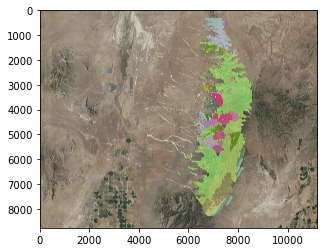

In [28]:
plt.imshow(img)

In [29]:
# Or read as a texture for PyVista
texture = pv.read_texture(filename)
texture

(Texture)0x13882c130

So now that we have the image loaded as a texture, we need to associate it with the topography surface so that it can be display ontop of the topography. To do so, we use the UV coordinates defineed above with `pyvista`'s `texture_map_to_plane` method.

In [30]:
# Perfrom the texture mapping
topo_tex = topo.texture_map_to_plane(origin, point_u, point_v)
# Associate that texture
topo_tex.textures["map"] = texture

In [31]:
p = pv.Plotter(notebook=True)
p.add_mesh(topo_tex)
p.show()

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

### Point Clouds of Data

Let's check out the `well_based_temperature.csv` file

In [32]:
temp_df = pd.read_csv("./forge-demo/data/well_based_temperature.csv")
temp_df.head()

,x,y,z,T
0,339385.01,4264212.99,1680.6,150.0
1,339385.01,4264212.99,880.6,195.0
2,339385.01,4264212.99,-119.4,195.0
3,337709.02,4260660.00,1596.3,250.0
4,337709.02,4260660.00,796.3,262.0


In [33]:
temp = pv.PolyData(temp_df[["x", "y", "z"]].values)
temp["Temperature (C)"] = temp_df["T"]
temp.plot(cmap="coolwarm", render_points_as_spheres=True)

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

### Shape Files

We were also given some shape files in the `Roosevelt Hot Springs FORGE Site Outline` directory, so let's deal with those too

In [34]:
filename = "./forge-demo/data/Roosevelt Hot Springs FORGE Site Outline/FORGE_Outline"
shp = shapefile.Reader(filename)
records = shp.shapeRecords()
records

ShapeRecords: [<shapefile.ShapeRecord object at 0x138858750>]

In [35]:
shape = records[0].shape
shape.shapeType == shapefile.POLYGON

True

In [36]:
def _fix_to_topography(topo_points, points_to_update, static=20.0):
    """Update the z component of points to force them to lie on a topo surface"""
    tree = Tree(topo_points)
    ind = tree.query(points_to_update, k=1)[1].ravel()
    # Now update the elevation to be on the topo surface
    # Also shift it so its always just above the surface and not in the surface
    points_to_update[:,2] = topo_points[:,2][ind] + static
    return points_to_update


def polygon_to_vtk(polygon, topo_points):
    """Converts a polygon shape to a pyvista.PolyData object.
    This assumes the points are ordered.
    """
    pts = np.array(polygon.points)
    pts = np.c_[pts, np.zeros(pts.shape[0])]
    pts = _fix_to_topography(topo_points, pts)
    return pv.lines_from_points(pts)
    

boundary = polygon_to_vtk(shape, topo.points)
boundary

PolyData,Information
N Cells,10
N Points,11
X Bounds,"3.329e+05, 3.361e+05"
Y Bounds,"4.261e+06, 4.265e+06"
Z Bounds,"1.600e+03, 1.730e+03"
N Arrays,0


## Put it all Together

In [37]:
p = pv.Plotter(notebook=True)
p.add_mesh(topo_tex)
p.add_mesh(temp, cmap="coolwarm", render_points_as_spheres=True, point_size=10)
p.add_mesh(granite, color="gray")
p.add_mesh(negro, color="orange")
p.add_mesh(opal, color="blue")
p.add_mesh(boundary, color="yellow")

(vtkmodules.vtkRenderingOpenGL2.vtkOpenGLActor)0x138863fa0

In [38]:
p.show_grid()
p.show()

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

### 3D Model

We were also given a 3D temperature model in GSLib format: `data/temperature_model.sgems`. There are file readers for this format in many software libraries, but it's useful to show how reading a custom file format can be done using `pandas`.

It's also important to note that the GSLib/SGeMS format is a well used standard but it is still not a "digital" format. The spatial reference of the grid given is totally absent and typically given in a readme file with the data. In this case, the origin and spacing of the gird are given as:

```
origin = [325000., 4.245e6, -2700]
spacing = [250, 250, 50]
```

In [39]:
!head ./forge-demo/data/temperature_model.sgems

100 160 100
2
Temperature (C)	
variance
107.475448608	11614.9433594
107.438682556	11599.2001953
114.550773621	11703.9541016
114.49145507799999	11686.5986328
114.429496765	11668.7558594
114.364952087	11650.4462891


So it appears we have a header, the number of data arrays, the data titles, then the data arrays as a table.

In [40]:
with open("./forge-demo/data/temperature_model.sgems", "r") as f:
    extent = [int(d) for d in f.readline().strip().split()]
    n_arrays = int(f.readline().strip())
    titles = []
    for i in range(n_arrays):
        titles.append(f.readline().strip())
    model_df = pd.read_table(f, names=titles, delim_whitespace=True)
model_df.head()

,Temperature (C),variance
0,107.475449,11614.943359
1,107.438683,11599.200195
2,114.550774,11703.954102
3,114.491455,11686.598633
4,114.429497,11668.755859


In [41]:
# Now make a grid
model = pv.UniformGrid()
model.dimensions = np.array(extent) + 1
model.spacing = [250, 250, 50]
model.origin = [325000., 4.245e6, -2700]
for name in model_df.keys():
    model[name] = model_df[name].values
model

UniformGrid (0x189bac1a0)
  N Cells:	1600000
  N Points:	1642361
  X Bounds:	3.250e+05, 3.500e+05
  Y Bounds:	4.245e+06, 4.285e+06
  Z Bounds:	-2.700e+03, 2.300e+03
  Dimensions:	101, 161, 101
  Spacing:	2.500e+02, 2.500e+02, 5.000e+01
  N Arrays:	2

In [42]:
model.plot(show_grid=True, cmap="coolwarm")

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

This model has a massive spatial extent. Let's clip it down to our region of interest.

In [43]:
box = topo.bounds
box[4:6] = model.bounds[4:6]
voi = model.clip_box(box, invert=False)
voi

UnstructuredGrid (0x1911ca980)
  N Cells:	2751996
  N Points:	548393
  X Bounds:	3.298e+05, 3.442e+05
  Y Bounds:	4.253e+06, 4.271e+06
  Z Bounds:	-2.700e+03, 2.300e+03
  N Arrays:	2

In [44]:
p = pv.Plotter(notebook=True)
p.add_mesh(topo_tex)
p.show_grid()
p.add_mesh(voi, cmap="coolwarm")
p.show()

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

Okay, but our model still show's data above the topography surface. Let's remove that.

In [45]:
subsurface = PVGeo.grids.ExtractTopography(
            remove=True, # remove the inactive cells
            tolerance=20.0 # buffer around the topo surface
           ).apply(voi, topo)
subsurface

UnstructuredGrid (0x1847803d0)
  N Cells:	2481073
  N Points:	472076
  X Bounds:	3.299e+05, 3.442e+05
  Y Bounds:	4.253e+06, 4.271e+06
  Z Bounds:	-2.700e+03, 2.300e+03
  N Arrays:	3

### The Final Scene

In [48]:
p = pv.Plotter(notebook=True)
p.add_mesh(topo_tex)
p.add_mesh(temp, cmap="coolwarm", render_points_as_spheres=True, point_size=10)
p.add_mesh(granite, color="gray")
p.add_mesh(negro, color="orange")
p.add_mesh(opal, color="blue")
p.show_grid()
p.add_mesh(boundary, color="yellow")
p.add_mesh_threshold(subsurface, cmap="coolwarm")
p.show()

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

### Environment

In [46]:
pv.Report(["PVGeo", "shapefile", "pandas", "sklearn"], sort=True)

--------------------------------------------------------------------------------
  Date: Sun Nov 07 18:26:11 2021 CST

                OS : Darwin
            CPU(s) : 4
           Machine : x86_64
      Architecture : 64bit
       Environment : Jupyter
        GPU Vendor : Intel Inc.
      GPU Renderer : Intel(R) Iris(TM) Graphics 6100
       GPU Version : 4.1 INTEL-10.36.32

  Python 3.7.10 | packaged by conda-forge | (default, Feb 19 2021, 15:59:12)
  [Clang 11.0.1 ]

             PVGeo : 2.1.0
         shapefile : 2.1.3
            pandas : 1.2.5
           sklearn : 0.24.2
           pyvista : 0.31.dev0
               vtk : 9.0.1
             numpy : 1.21.0
           imageio : 2.9.0
           appdirs : 1.4.4
            scooby : 0.5.7
            meshio : 4.4.6
        matplotlib : 3.4.2
           IPython : 7.24.1
          colorcet : 1.0.0
           cmocean : 2.0
        ipyvtklink : 0.2.1
             scipy : 1.6.3
              tqdm : 4.61.1
--------------------------------------------------------------------------------

# 下节课预告
<br/>

<center class="half">
    <img src="./fig/geo.gif" style="float: center; width:600px"/> 
</center>  